In [1]:
### Libs
import numpy as np
import pickle
import os

def load_data(file):
   
    print('loading file: ' + file)
    with open(file, 'rb') as f:
        data = pickle.load(f)

    return(data)

def average_across_points(dat, window_size=10):
    dshape = dat['eeg'].shape
    new_length = dshape[-1] // window_size
    
    eeg_reshaped = dat['eeg'][:, :, :new_length * window_size].reshape(dshape[0], dshape[1], new_length, window_size)
    dat['eeg'] = eeg_reshaped.mean(axis=-1)
    dat['time'] = dat['time'][:new_length * window_size].reshape(new_length, window_size).mean(axis=-1)
    
    return dat

def upper(df):

    try:
        assert(type(df)==np.ndarray)
    except:
        if type(df)==pd.DataFrame:
            df = df.values
        else:
            raise TypeError('Must be np.ndarray or pd.DataFrame')
    mask = np.triu_indices(df.shape[0], k=1)
    return df[mask]

### Plotting settings
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rc('image', cmap='viridis')

plt.rcParams.update({
    "font.family": "serif",  
    # use serif/main font for text elements
    })
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'axes.linewidth': 2.5})
plt.rcParams.update({'axes.labelweight': 'bold'})
plt.rcParams.update({'axes.labelsize': 20})
plt.rc('legend',fontsize=12)

In [56]:
import os
import numpy as np

# Prep vars
subject_ids = [2, 3, 4, 5, 7, 8, 10, 11, 12]
main_folder = "/projects/crunchie/boyanova/EEG_Things/eeg_experiment/"
conds = ["fix_det", "fix_rand", "img_det", "img_rand"]

# Load and preprocess EEG data for the first subject
sub = subject_ids[0]  # Default subject for initial loading
eeg_data = load_data(os.path.join(main_folder, f"eeg_epoched/eeg_things_{sub:04d}_fix.pickle"))
eeg_data = average_across_points(eeg_data, window_size=10)
time = eeg_data["time"]

# Initialize a dictionary to hold data for all subjects and conditions
subject_data = {key: [] for key in conds}

# Load data for all subjects and conditions
for sub in subject_ids:
    file_path = os.path.join(main_folder, f"eeg_decoding/eeg_TG_within_{sub:04d}.pickle")
    loaded_data = load_data(file_path)  # Load once per subject
    for key in conds:
        subject_data[key].append(loaded_data[key])

# Convert lists to NumPy arrays for faster operations
subject_data = {key: np.array(data) for key, data in subject_data.items()}

    

loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_epoched/eeg_things_0000_fix.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_TG_within_0000.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_TG_within_0001.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_TG_within_0002.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_TG_within_0003.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_TG_within_0004.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_TG_within_0005.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_TG_within_0007.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_TG_within_0008.pickle
loading file: /projects/crunchie/boya

In [6]:
# Prep vars
subject_ids = [2, 3, 4, 5, 7, 8, 10, 11, 12]
main_folder = "/projects/crunchie/boyanova/EEG_Things/eeg_experiment/"


# Load and preprocess EEG data for the first subject
sub = subject_ids[0]  # Default subject for initial loading
eeg_data = load_data(os.path.join(main_folder, f"eeg_epoched/eeg_things_{sub:04d}_fix.pickle"))
eeg_data = average_across_points(eeg_data, window_size=10)
time = eeg_data["time"]

# Initialize a dictionary to hold data for all subjects and conditions
#subject_data = {key: [] for key in conds}
subject_data = {}
# Load data for all subjects and conditions
for sub in subject_ids:
    file_path = os.path.join(main_folder, f"eeg_decoding/eeg_TG_att_{sub:04d}.pickle")
    loaded_data = load_data(file_path)  # Load once per subject

    for key in loaded_data.keys():
        if sub == 2:
            subject_data[key] = []
        
        subject_data[key].append(loaded_data[key])

# Convert lists to NumPy arrays for faster operations
subject_data = {key: np.array(data) for key, data in subject_data.items()}

loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_epoched/eeg_things_0002_fix.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_TG_att_0002.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_TG_att_0003.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_TG_att_0004.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_TG_att_0005.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_TG_att_0007.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_TG_att_0008.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_TG_att_0010.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_TG_att_0011.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_expe

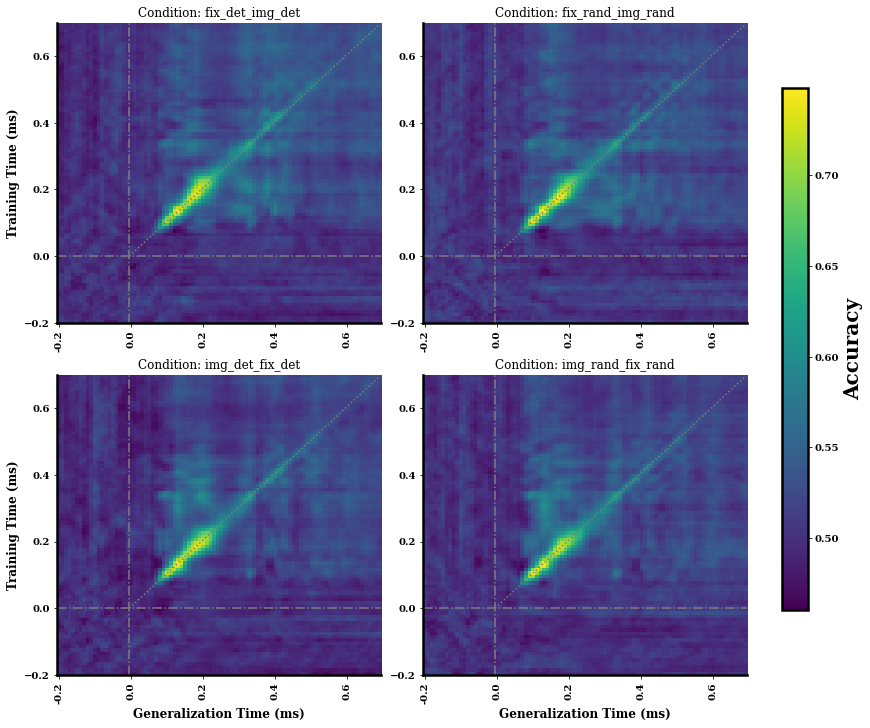

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `TG_data` contains temporal generalization data for conditions
conds = list(subject_data.keys())
tg_cmap = 'viridis'

# Calculate half-step difference for extent
t_dif = np.diff(time)[0] / 2
plt_extent = (time[0] - t_dif, time[-1] + t_dif, time[0] - t_dif, time[-1] + t_dif)

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over conditions and plot each on a subplot
for i, cond in enumerate(conds):
    ax = axes[i]
    TG_matrix = np.nanmean(subject_data[cond], axis=(0, 1, 2))
    
    im = ax.imshow(
        TG_matrix, 
        origin='lower', 
        extent=plt_extent, 
        interpolation='none', 
        aspect='auto', 
        cmap=tg_cmap
    )
    
    # Add grid lines and diagonal
    ax.axvline(0, color='tab:gray', linestyle='-.')
    ax.axhline(0, color='tab:gray', linestyle='-.')
    ax.plot([0, time[-1]], [0, time[-1]], color='tab:gray', linestyle=':')
    

    ax.set_title(f"Condition: {cond}")
    ax.set_yticks(np.round(time[::20], 2))
    ax.set_xticks(time[::20])  # Set the ticks
    ax.set_xticklabels(np.round(time[::20], 2), rotation=90)  # Rotate the tick labels

    
     # Add labels
    if i == 0 or i == 2:
        ax.set_ylabel("Training Time (ms)", fontsize = 12)
    if i == 2 or i == 3:
        ax.set_xlabel("Generalization Time (ms)", fontsize = 12)
        

# Use the parent figure for placing the colorbar
cbar = fig.colorbar(im, ax=axes, orientation='vertical', label='Accuracy', shrink=0.8, aspect=20)
plt.show()
plt.savefig(os.path.join(main_folder, f"results/TempGen_between.png"))


Text(0.5, 0.1, 'Off-Diagonal \n Decoding')

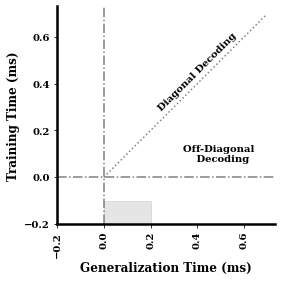

In [52]:
### Create Temp Gen Figure
plt.axvline(0, color='tab:gray', linestyle='-.')
plt.axhline(0, color='tab:gray', linestyle='-.')
plt.plot([0, time[-1]], [0, time[-1]], color='tab:gray', linestyle=':')

plt.axis('square')
plt.yticks(np.round(time[::20], 2))
plt.xticks(np.round(time[::20], 2), rotation=90)
#plt.axvline(0.2, color='tab:gray', linestyle='-.')

plt.ylabel("Training Time (ms)", fontsize = 12)
plt.xlabel("Generalization Time (ms)", fontsize = 12)


# Add a gray rectangle between x=0.0 and x=0.2
#plt.axvspan(0.0, 0.2, color='gray', alpha=0.2)
plt.fill_between(
    x=[0.0, 0.2],
    y1=[-0.2, -0.2],
    y2=[-0.1, -0.1], 
    color='gray', 
    alpha=0.2
)

# Add diagonal text
plt.text(0.4, 0.45, "Diagonal Decoding", rotation=45, fontsize=10, 
         color='k', ha='center', va='center')

# Add lower quadrant text
plt.text(0.5, 0.1, "Off-Diagonal \n Decoding", fontsize=10, 
         color='k', ha='center', va='center')
